In [62]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import completeness_score, silhouette_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(r"datasets\penguins_binary_classification.csv")
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
df.head()

Dataset Shape: (274, 7)

First few rows of the dataset:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007


#### The `year` and `species` columns are not needed for the clustering task.
Will drop them.


In [63]:
cluster_features = ["island", "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

#### `Island` column needs to be encoded since it is a categorical variable.


In [64]:
# one-hot encode the `Island` column
df["island"] = df["island"].map({"Torgersen": -1, "Biscoe": 0, "Dream": 1})

# display the first few rows of the dataset
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,-1,39.1,18.7,181.0,3750.0,2007
1,Adelie,-1,39.5,17.4,186.0,3800.0,2007
2,Adelie,-1,40.3,18.0,195.0,3250.0,2007
3,Adelie,-1,36.7,19.3,193.0,3450.0,2007
4,Adelie,-1,39.3,20.6,190.0,3650.0,2007


#### Scale the features


In [65]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df[cluster_features])

#### Apply PCA for `x_scaled`

In [66]:
pca = PCA(n_components=2, random_state=99)
x_scaled_2d = pca.fit_transform(x_scaled)

#### Plot the PCA-transformed data

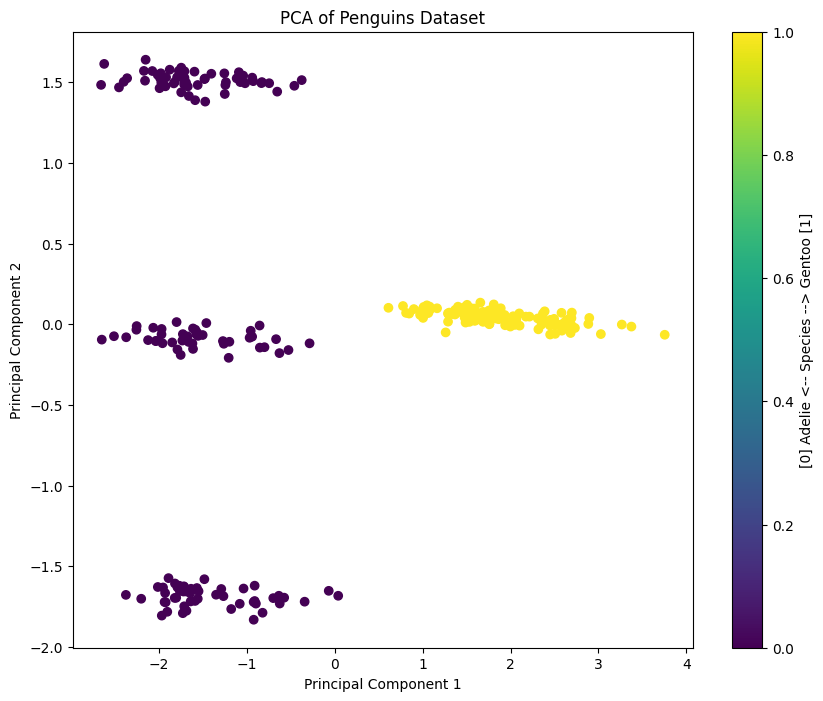

In [67]:
# Create a scatter plot of the PCA-transformed data, color by species
species_codes = df["species"].map({"Adelie": 0, "Gentoo": 1})
plt.figure(figsize=(10, 8))
plt.scatter(x_scaled_2d[:, 0], x_scaled_2d[:, 1], c=species_codes, cmap="viridis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Penguins Dataset")
plt.colorbar(label="[0] Adelie <-- Species --> Gentoo [1]")
plt.show()


#### Train KMeans with number of clusters from 2 to 5

In [68]:
results = []

for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=99)
    cluster_labels = kmeans.fit_predict(x_scaled)

    completeness = completeness_score(df["species"], cluster_labels)
    silhouette = silhouette_score(x_scaled, cluster_labels)
    inertia = kmeans.inertia_

    results.append({
        "n_clusters": n_clusters,
        "completeness": completeness,
        "silhouette": silhouette,
        "inertia": inertia,
    })

results_df = pd.DataFrame(results)
results_df

,n_clusters,completeness,silhouette,inertia
0,2,1.000000,0.522818,581.518384
1,3,0.692280,0.399022,505.187129
2,4,0.511030,0.423876,293.793330
3,5,0.432152,0.382416,243.796126


#### Train Agglomerative Clustering with number of clusters=2

In [69]:
clusters = 2
agglomerative = AgglomerativeClustering(n_clusters=clusters)
cluster_labels = agglomerative.fit_predict(x_scaled)
completeness = completeness_score(df["species"], cluster_labels)
silhouette = silhouette_score(x_scaled, cluster_labels)

results = {
    "n_clusters": clusters,
    "completeness": completeness,
    "silhouette": silhouette,
}
results_df = pd.DataFrame([results])
results_df

,n_clusters,completeness,silhouette
0,2,1.0,0.522818
